# MVD 3. cvičení

## 1. část - Stažení a načtení předtrénovaných GloVe slovních reprezentací


### Stažení dat

Pro toto cvičení můžete používat předtrénované Word2Vec nebo GloVe vektory. Následující text se vztahuje ke GloVe vektorům, které byly vybrány z důvodu menší velikosti. 

Základní verzi vektorů lze stáhnout [zde (GloVe link)](https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip).

Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 300d vectors, 822 MB download)

Po rozbalení staženého archivu budete mít několik verzí o různé dimenzi vektorů - 50d, 100d, 200d, 300d. Je doporučeno začít pracovat s nejmenšími vektory a na větších spouštět až závěrečné řešení.

### Načtení dat

Data jsou uložena v textovém souboru, kde je na každém řádku slovo a jeho příslušný vektor.

Načtení je vhodné provést do dvou proměnných -> words, vectors. Words bude list o délce *n* a vectors bude matice o velikosti *(n, d)*. 

Zároveň vytvořte slovník word2idx, pomocí kterého lze získat index libovolného slova (pomocí *word2idx['queen']*).

In [1]:
import numpy as np

In [2]:
filename = 'glove.6B/glove.6B.50d.txt'
# filename = 'glove.6B/glove.6B.100d.txt'
# filename = 'glove.6B/glove.6B.200d.txt'
# filename = 'glove.6B/glove.6B.300d.txt'

with open(filename, 'r') as f:
    words = []
    vectors = []
    word2idx = {}
    for idx, line in enumerate(f):
        line = line.strip().split()
        word = line[0]
        vec = line[1:]
        words.append(word)
        vectors.append(vec)
        word2idx[word] = idx
        
words = np.array(words)
vectors = np.array(vectors, dtype=np.float32)
print(words[:5])
print(vectors[:5])

['the' ',' '.' 'of' 'to']
[[ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
  -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
  -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
  -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
  -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
   4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
   1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
  -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
  -1.1514e-01 -7.8581e-01]
 [ 1.3441e-02  2.3682e-01 -1.6899e-01  4.0951e-01  6.3812e-01  4.7709e-01
  -4.2852e-01 -5.5641e-01 -3.6400e-01 -2.3938e-01  1.3001e-01 -6.3734e-02
  -3.9575e-01 -4.8162e-01  2.3291e-01  9.0201e-02 -1.3324e-01  7.8639e-02
  -4.1634e-01 -1.5428e-01  1.0068e-01  4.8891e-01  3.1226e-01 -1.2520e-01
  -3.7512e-02 -1.5179e+00  1.2612e-01 -2.4420e-02 -4.2961e-

## 2. část - Kosinová podobnost

Vytvořte funkci cossim, která bude vracet kosinovu podobnost dvou vstupních vektorů.

<br>
<center>
$
similarity(a,b) = cos(\theta) = \frac{a \cdot b}{\lVert a \lVert \lVert b \lVert}
$
</center>

In [3]:
def cossim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

## 3. část - Slovní analogie

Nejznámější slovní analogií je z Word2Vec $f("king") - f("man") = f("queen") - f("woman")$

1. Vytvořte skript pro hledání analogií $f("king") - f("man") = f("??") - f("woman")$ a vyzkoušejte i nějaké další.
2. Vypište 5 nejpodobnějších slov

In [4]:
def find_analogy(word1, word2, word4, words, vectors, word2idx, top=5):
    idx1 = word2idx[word1]
    idx2 = word2idx[word2]
    idx4 = word2idx[word4]
    
    vec1 = vectors[idx1]
    vec2 = vectors[idx2]
    vec4 = vectors[idx4]
    
    unknown_vec = vec1 - (vec2 - vec4)
    
    similarities = np.array([cossim(unknown_vec, v) for v in vectors])
    
    # Exclude the input words from the results
    exclude_indices = idx1, idx2, idx4
    top_indices = [i for i in np.argsort(similarities)[::-1] if i not in exclude_indices][:top]
    
    return words[top_indices]

In [5]:
# 'word1' - 'word2' = '???' - 'word4'
test_words = (
    ('king', 'man', 'woman'),
    ('hitler', 'germany', 'russia'),
    ('paris', 'france', 'germany'),
    ('snowman', 'christmas', 'halloween'),
)
for ws in test_words:
    result = find_analogy(*ws, words, vectors, word2idx)
    print("{:<{width}}  {}".format(str(ws), result, width=40))



('king', 'man', 'woman')                  ['queen' 'daughter' 'prince' 'throne' 'princess']
('hitler', 'germany', 'russia')           ['stalin' 'putin' 'khrushchev' 'soviet' 'gorbachev']
('paris', 'france', 'germany')            ['berlin' 'frankfurt' 'munich' 'vienna' 'hamburg']
('snowman', 'christmas', 'halloween')     ['pyro' 'abominable' 'jetsons' 'snowmen' 'gumby']


### Bonus - Vytvořte vizualizaci slovních analogií

Pro získání bonusového bodu je potřeba vytvořit vizualizaci slovních analogií (redukce dimenze + vizualizace).

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
def plot_vectors(words_to_plot: np.ndarray, words_str: list[str]):
    """
    Plot 2D representation of the analogies-vectors.
    :param words_to_plot: 2D representation of the 4 vectors
    :param analogies: list of 4 words
    """
    plt.figure(figsize=(7, 7))
    for i, word in enumerate(words_str):
        x, y = words_to_plot[i]
        plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1)
        plt.text(x, y, f"{word} - ({x:.0f},{y:.0f})", fontsize=12)
        
    # Plot the shift vectors of every pair in red
    x1, y1 = words_to_plot[0]
    x2, y2 = words_to_plot[1]
    x3, y3 = words_to_plot[2]
    x4, y4 = words_to_plot[3]
    plt.quiver(x1, y1, x2-x1, y2-y1, angles='xy', scale_units='xy', scale=1, color='red')
    plt.quiver(x3, y3, x4-x3, y4-y3, angles='xy', scale_units='xy', scale=1, color='red')
    
    
    plt.grid()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Analogy visualization')
    
    # Limit the plot to the maximum value of the vectors
    plt.xlim(np.min(words_to_plot[:, 0] - 5), np.max(words_to_plot[:, 0]) + 5)
    plt.ylim(np.min(words_to_plot[:, 1] - 5), np.max(words_to_plot[:, 1]) + 5)
    
    plt.show()

In [10]:
tsne = TSNE(n_components=2, perplexity=3)
result = find_analogy(test_words[0][0], test_words[0][1], test_words[0][2], words, vectors, word2idx, top=1)
analogies = [test_words[0][0], test_words[0][1], result[0].__str__(), test_words[0][2]]
# print(analogies)

indices = [word2idx[word] for word in analogies]
vectors_2d = tsne.fit_transform(vectors[indices])

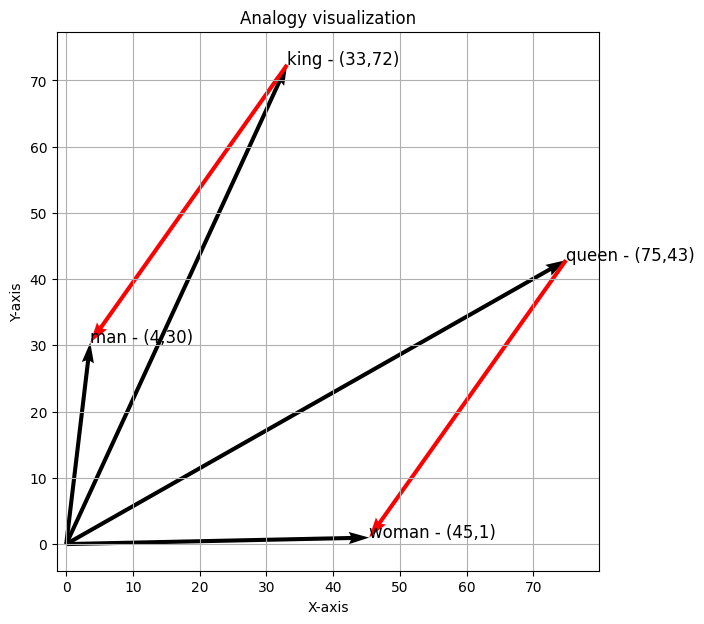

In [11]:
# print(analogies)
# print(vectors_2d)
plot_vectors(vectors_2d, analogies)